## Kyron Taylor

## Ai Development Pt.1

## 8/22/25

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [6]:
cols = ["fLength", "fWidth", "fSize", "FConc", "fConc1" , "fAsym", "fM3Long" , "fM3Trasns", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,FConc,fConc1,fAsym,fM3Long,fM3Trasns,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [7]:
df["class"] = (df["class"] == "g").astype(int)

In [8]:
df.head()

,fLength,fWidth,fSize,FConc,fConc1,fAsym,fM3Long,fM3Trasns,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


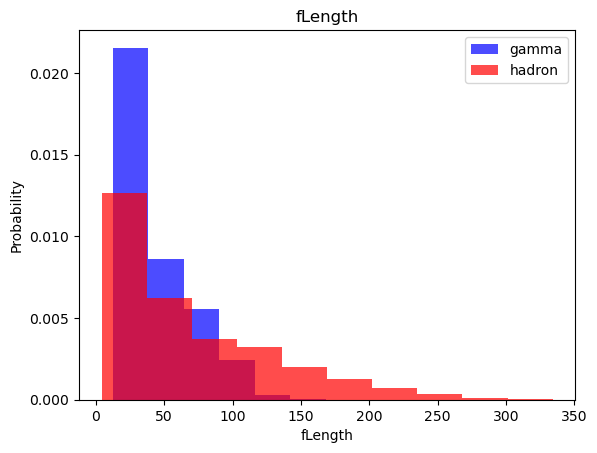

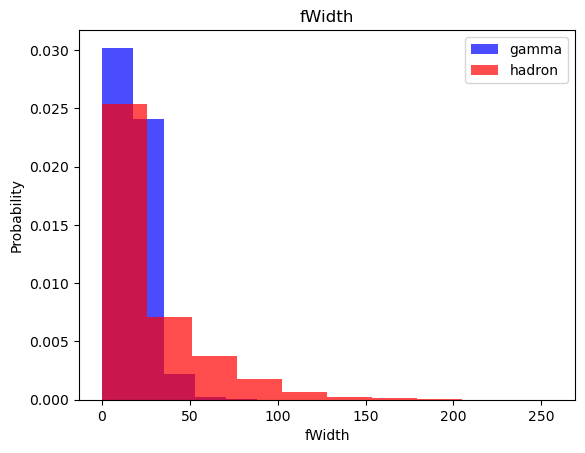

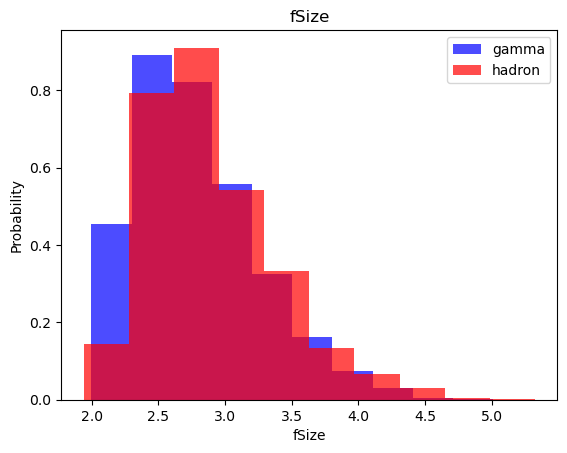

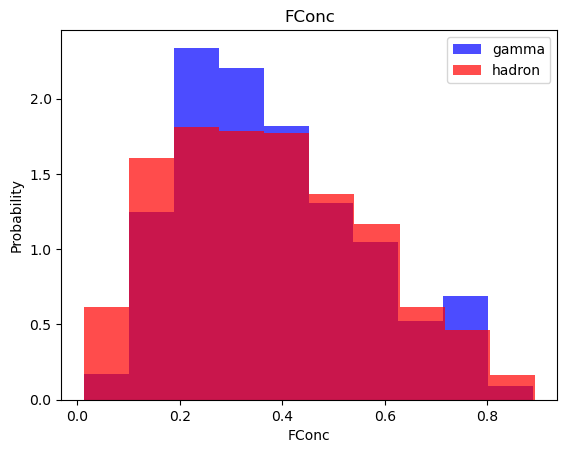

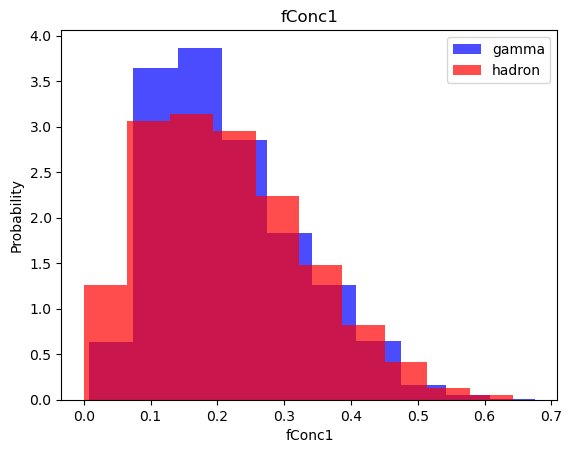

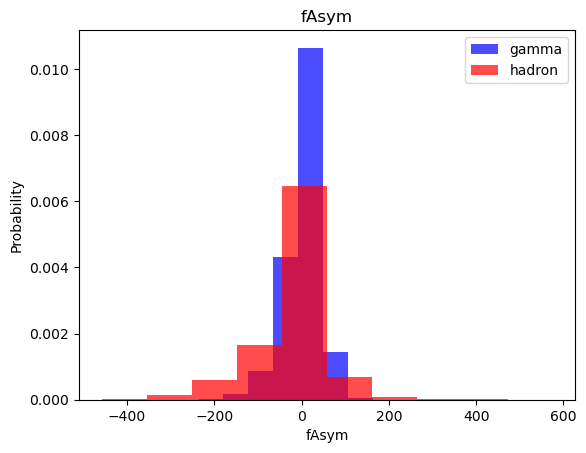

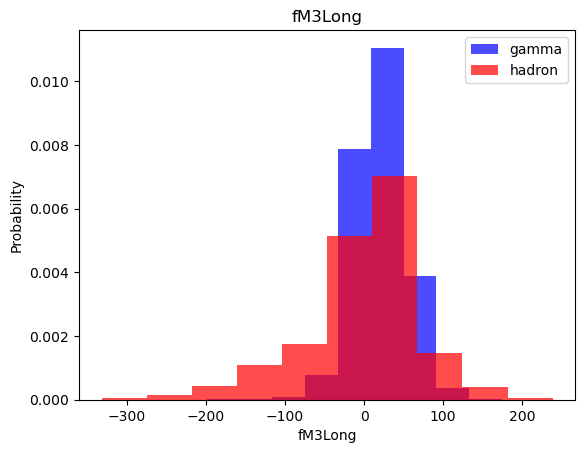

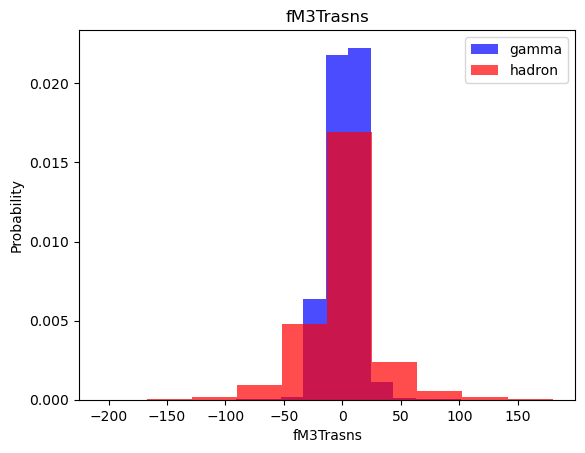

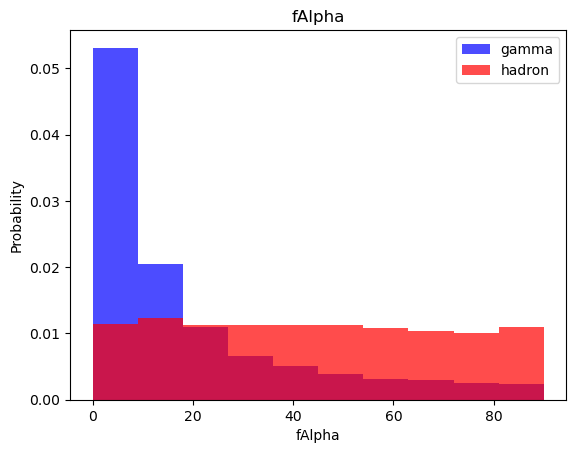

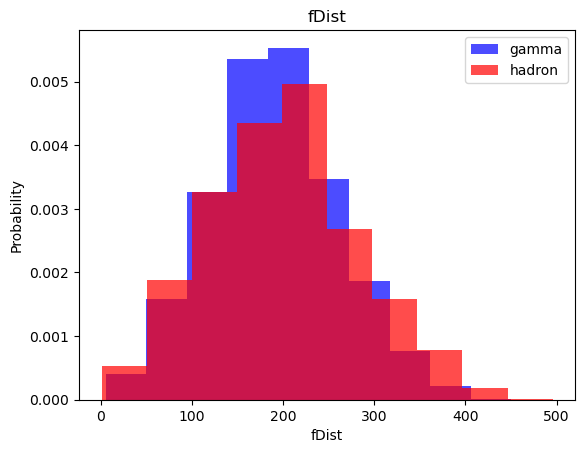

In [9]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color='blue', label= 'gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color='red', label= 'hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

## Train, valdiation, test datasets

In [10]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

C:\Users\taylor70817\AppData\Local\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [11]:
def scale_dataset(dataframe, oversampler=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversampler:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X , y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [12]:
train, X_train, y_train = scale_dataset(train, oversampler=True)
valid, X_valid, y_valid = scale_dataset(valid, oversampler=False)
test, X_test, y_test = scale_dataset(test, oversampler=False)

In [13]:
len(y_train)

14718

In [14]:
sum(y_train == 1)

np.int64(7359)

In [15]:
sum(y_train == 0)

np.int64(7359)

## kNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [40]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
y_pred = knn_model.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1351
           1       0.85      0.87      0.86      2453

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804

